In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

A:\Anaconda\envs\MachineLearning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
A:\Anaconda\envs\MachineLearning\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
A:\Anaconda\envs\MachineLearning\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('telecom-Hybrid.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn_flag,Support_Tickets_Opened,Engagement_Score,Discount_Rate,Customer_Lifetime_Value,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,0,0,45.8,4.01,119.4,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,0,2,51.4,3.98,1366.8,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,1,1,57.2,2.12,538.5,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,0,2,39.1,3.86,846.0,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,1,2,26.2,3.16,565.6,151.65,Yes


In [3]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_flag,Support_Tickets_Opened,Engagement_Score,Discount_Rate,Customer_Lifetime_Value,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370,1.669459,58.538265,3.572781,1148.552676,2279.734304
std,0.368612,24.559481,30.090047,0.441561,1.357367,15.800460,1.708529,1069.864812,2266.794470
min,0.000000,0.000000,18.250000,0.000000,0.000000,9.500000,0.000000,56.550000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,1.000000,46.300000,2.260000,412.650000,398.550000
50%,0.000000,29.000000,70.350000,0.000000,1.000000,59.200000,3.410000,782.000000,1394.550000
75%,0.000000,55.000000,89.850000,1.000000,2.000000,71.100000,4.820000,1416.225000,3786.600000
max,1.000000,72.000000,118.750000,1.000000,9.000000,100.000000,9.180000,5137.000000,8684.800000


In [5]:
df.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
Churn_flag                 0
Support_Tickets_Opened     0
Engagement_Score           0
Discount_Rate              0
Customer_Lifetime_Value    0
TotalCharges               0
Churn                      0
dtype: int64

In [6]:
churn_rate = df['Churn_flag'].mean() *100
print(churn_rate)

26.536987079369588


In [7]:
revenue_at_risk = df.loc[df['Churn_flag'] == 1, 'Customer_Lifetime_Value'].sum()

In [8]:
revenue_at_risk

1471330.15

In [9]:
# Churn analysis by Contract type
contract_summary = (
    df.groupby('Contract')
    .agg(
        customers=('customerID', 'count'),
        churners=('Churn_flag', 'sum'),
        avg_CLV=('Customer_Lifetime_Value', 'mean'),
        median_MonthlyCharges=('MonthlyCharges', 'median')
    )
    .reset_index()
)

# Calculating churn rate (%)
contract_summary['churn_rate (%)'] = (contract_summary['churners'] / contract_summary['customers'] * 100).round(1)
contract_summary['avg_CLV'] = contract_summary['avg_CLV'].round(2)
contract_summary['median_MonthlyCharges'] = contract_summary['median_MonthlyCharges'].round(2)

contract_summary

,Contract,customers,churners,avg_CLV,median_MonthlyCharges,churn_rate (%)
0,Month-to-month,3875,1655,557.63,73.25,42.7
1,One year,1473,166,1335.65,68.75,11.3
2,Two year,1695,48,2336.89,64.35,2.8


In [10]:
payment_summary = (
    df.groupby('PaymentMethod')
      .agg(customers=('customerID','count'),
           churners=('Churn_flag','sum'))
      .reset_index()
)
payment_summary['churn_rate (%)'] = (payment_summary['churners'] / payment_summary['customers'] * 100).round(1)
payment_summary = payment_summary.sort_values('churn_rate (%)', ascending=False)
payment_summary.head(3)


,PaymentMethod,customers,churners,churn_rate (%)
2,Electronic check,2365,1071,45.3
3,Mailed check,1612,308,19.1
0,Bank transfer (automatic),1544,258,16.7


In [11]:
# Tenure buckets 
bins = [ -1, 6, 12, 24, 48, df['tenure'].max() ]
labels = ['0-6','7-12','13-24','25-48','49+']

df['Tenure_bucket'] = pd.cut(df['tenure'], bins=bins, labels=labels)

tenure_summary = (
    df.groupby('Tenure_bucket')
      .agg(
         customers=('customerID','count'),
         churners=('Churn_flag','sum'),
         churn_rate_pct=('Churn_flag', lambda x: round(100 * x.sum() / x.count(), 1)),
         avg_CLV=('Customer_Lifetime_Value','mean')
      )
      .reset_index()
)

tenure_summary['avg_CLV'] = tenure_summary['avg_CLV'].round(2)
tenure_summary


,Tenure_bucket,customers,churners,churn_rate_pct,avg_CLV
0,0-6,1481,784,52.9,484.52
1,7-12,705,253,35.9,607.39
2,13-24,1024,294,28.7,708.20
3,25-48,1594,325,20.4,1029.63
4,49+,2239,213,9.5,2044.23


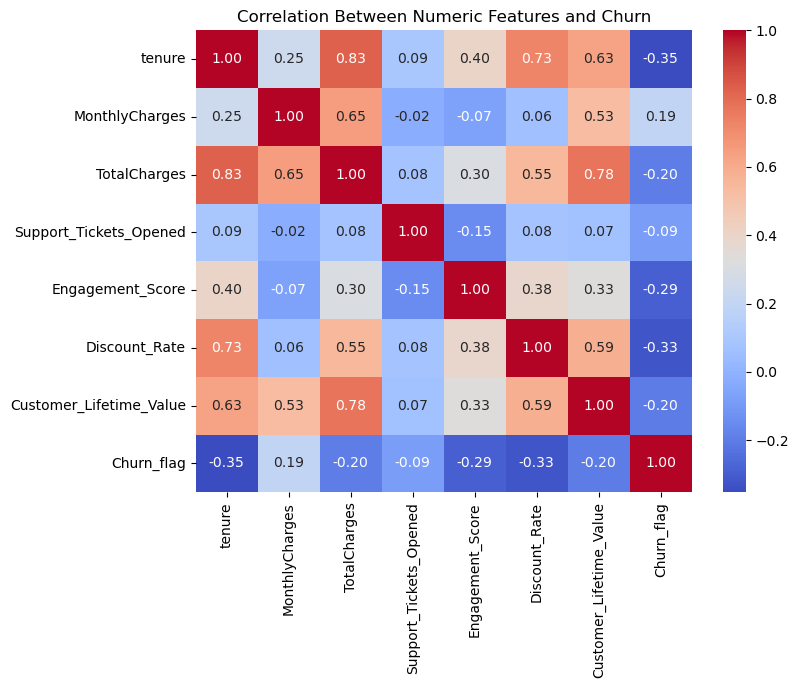

Churn_flag                 1.000000
MonthlyCharges             0.193356
Support_Tickets_Opened    -0.085109
TotalCharges              -0.198324
Customer_Lifetime_Value   -0.202997
Engagement_Score          -0.293741
Discount_Rate             -0.325453
tenure                    -0.352229
Name: Churn_flag, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'Support_Tickets_Opened', 'Engagement_Score',
    'Discount_Rate', 'Customer_Lifetime_Value', 'Churn_flag'
]

# Correlation matrix
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numeric Features and Churn")
plt.show()

# Sorting correlation with churn
churn_corr = corr['Churn_flag'].sort_values(ascending=False)
print(churn_corr)


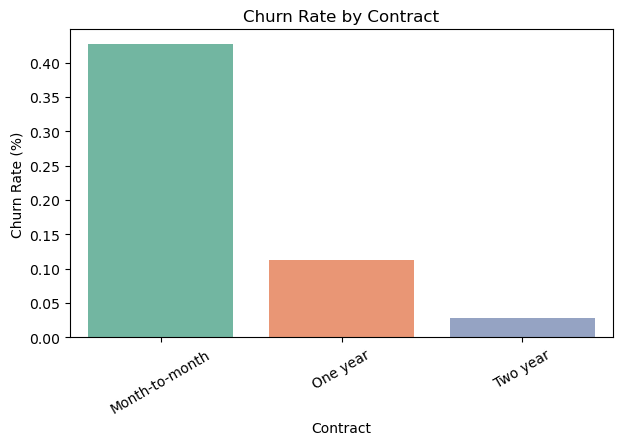

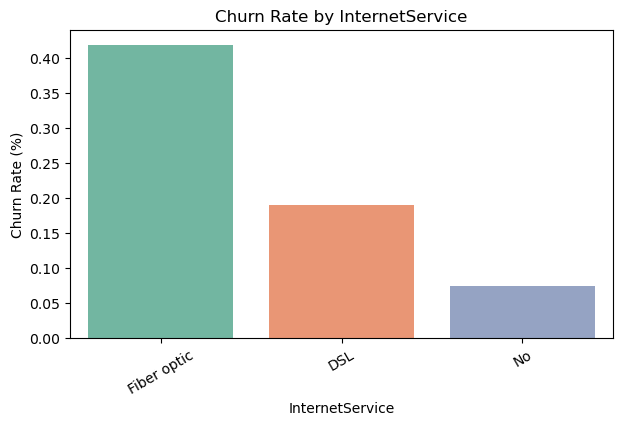

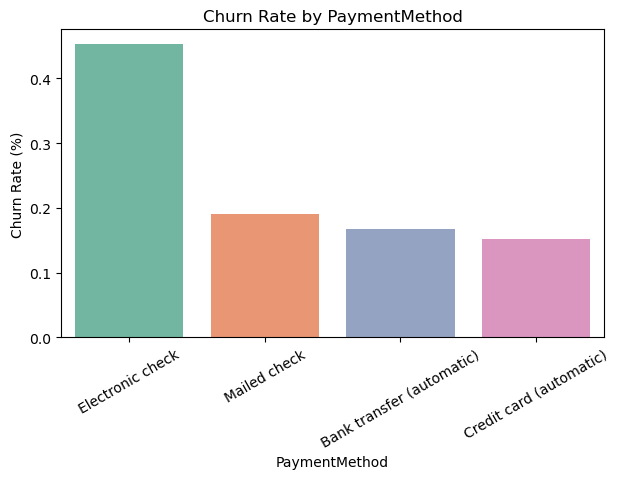

In [13]:
cat_cols = ['Contract', 'InternetService', 'PaymentMethod']
for col in cat_cols:
    churn_rate = df.groupby(col)['Churn_flag'].mean().reset_index().sort_values('Churn_flag', ascending=False)
    plt.figure(figsize=(7,4))
    sns.barplot(data=churn_rate, x=col, y='Churn_flag', palette='Set2')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.show()


In [14]:
# Telco Churn Prediction Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
import joblib

# 2. Feature selection

num_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges', 'Customer_Lifetime_Value',
    'Discount_Rate', 'Engagement_Score', 'Support_Tickets_Opened'
]

cat_cols = [
    'Contract', 'PaymentMethod', 'InternetService', 'PaperlessBilling'
]

# 3. Train-test split

X = df[num_cols + cat_cols]
y = df['Churn_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Preprocessing

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# 5. Model pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# 6. Train model

model.fit(X_train, y_train)

# 7. Predict + Evaluate

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("F1:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# 8. Score entire dataset

df['churn_prob'] = model.predict_proba(df[X.columns])[:, 1]
df['predicted_label'] = (df['churn_prob'] >= 0.5).astype(int)


AUC: 0.837008655383428
F1: 0.58203125
Precision: 0.6436285097192225
Recall: 0.5311942959001783


In [15]:
# Precision@K
def precision_at_k(y_true, y_prob, k=0.10):
    data = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    data = data.sort_values('y_prob', ascending=False).reset_index(drop=True)
    cutoff = max(1, int(len(data) * k))
    top_k = data.head(cutoff)
    return top_k['y_true'].mean(), cutoff  # returns precision and n_top

# y_test and y_pred_prob from earlier test split
prec10, n_top_test = precision_at_k(y_test.values, y_pred_prob, k=0.10)
print(f"Precision@Top10% (test): {prec10:.3f}  |  Top N (test): {n_top_test}")

# Precision@Top10% on full scored dataset 
# churn label should be 0/1 in our dataframe
prec10_all, n_top_all = precision_at_k(df['Churn_flag'].values, df['churn_prob'].values, k=0.10)
print(f"Precision@Top10% (all data): {prec10_all:.3f}  |  Top N (all): {n_top_all}")

# CLV sum for Top N (business)
def clv_topN(df, top_pct=0.10):
    n_top = max(1, int(len(df) * top_pct))
    topN = df.nlargest(n_top, 'churn_prob')
    return topN['Customer_Lifetime_Value'].sum(), n_top, topN

clv10, n_top, topN_df = clv_topN(df, top_pct=0.10)
print(f"CLV sum for Top10%: {clv10:.2f}  (Top N = {n_top})")


Precision@Top10% (test): 0.711  |  Top N (test): 211
Precision@Top10% (all data): 0.730  |  Top N (all): 704
CLV sum for Top10%: 506713.45  (Top N = 704)


In [16]:
# Scenario simulation (single call example)
def simulate_campaign(df, top_pct=0.10, conversion_rate=0.15, cost_per_contact=50, use_precision=False):
    clv_sum, n_top, topN = clv_topN(df, top_pct)
    campaign_cost = n_top * cost_per_contact
    if use_precision:
        # Only those who would have churned (precision fraction) can be saved
        precision, _ = precision_at_k(df['Churn_flag'].values, df['churn_prob'].values, k=top_pct)
        effective_savable_clv = clv_sum * precision
        recovered_revenue = effective_savable_clv * conversion_rate
    else:
        # Optimistic: recovered from all topN CLV with conversion
        recovered_revenue = clv_sum * conversion_rate

    net_recovered = recovered_revenue - campaign_cost
    return {
        'top_pct': top_pct,
        'n_top': n_top,
        'clv_topN': round(clv_sum,2),
        'precision_topN': round(prec10_all,3),
        'conversion_rate': conversion_rate,
        'cost_per_contact': cost_per_contact,
        'campaign_cost': round(campaign_cost,2),
        'recovered_revenue': round(recovered_revenue,2),
        'net_recovered': round(net_recovered,2)
    }

# Example scenarios
print(simulate_campaign(df, top_pct=0.10, conversion_rate=0.15, cost_per_contact=50, use_precision=True))
print(simulate_campaign(df, top_pct=0.10, conversion_rate=0.15, cost_per_contact=50, use_precision=False))

{'top_pct': 0.1, 'n_top': 704, 'clv_topN': 506713.45, 'precision_topN': 0.73, 'conversion_rate': 0.15, 'cost_per_contact': 50, 'campaign_cost': 35200, 'recovered_revenue': 55493.76, 'net_recovered': 20293.76}
{'top_pct': 0.1, 'n_top': 704, 'clv_topN': 506713.45, 'precision_topN': 0.73, 'conversion_rate': 0.15, 'cost_per_contact': 50, 'campaign_cost': 35200, 'recovered_revenue': 76007.02, 'net_recovered': 40807.02}
